# Parkinson's disease prediction

Dataset is available at this kaggle [link.](https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection)

### Steps
1. import necessary libraries
2. read the dataset
3. explore the data
4. feature selection
5. build the model
6. evaluate the model
7. save the model

In [1]:
# 1. import required libraries
import os, sys
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import joblib

In [2]:
# 2. read the dataset
parkinson_df = pd.read_csv('data/parkinsons.csv')
pd.set_option("display.max_columns", None)

parkinson_df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  
0  0.284654  
1  0.368674  
2  0.332634  
3  0.368975  
4  0.410335

In [3]:
# 3. explore data

parkinson_df.shape

(195, 24)

In [4]:
parkinson_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
parkinson_df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5    MDVP:APQ  Shimmer:DDA  \
count        195.000000    195.000000    195.000000  195.000000   195.000000   
mean           0.282251      0.015664      0.017878    0.024081     0.046993   
std            0.194877      0.010153      0.012024    0.016947     0.030459   
min            0.085000      0.004550      0.005700    0.007190     0.013640   
25%            0.148500      0.008245      0.009580    0.013080     0.024735   
50%            0.221000      0.012790      0.013470    0.018260     0.038360   
75%            0.350000      0.020265      0.022380    0.029400     0.060795   
max            1.302000      0.056470      0.079400    0.137780     0.169420   

              NHR         HNR      status        RPDE         DFA     spread1  \
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000   
mean     0.024847   21.885974    0.753846    0.498536    0.718099   -5.684397   
std      0.040418    4.425764    0.431878    0.103942    0.055336    1.090208   
min      0.000650    8.441000    0.000000    0.256570    0.574282   -7.964984   
25%      0.005925   19.198000    1.000000    0.421306    0.674758   -6.450096   
50%      0.011660   22.085000    1.000000    0.495954    0.722254   -5.720868   
75%      0.025640   25.075500    1.000000    0.587562    0.761881   -5.046192   
max      0.314820   33.047000    1.000000    0.685151    0.825288   -2.434031   

          spread2          D2         PPE  
count  195.000000  195.000000  195.000000  
mean     0.226510    2.381826    0.206552  
std      0.083406    0.382799    0.090119  
min      0.006274    1.423287    0.044539  
25%      0.174351    2.099125    0.137451  
50%      0.218885    2.361532    0.194052  
75%      0.279234    2.636456    0.252980  
max      0.450493    3.671155    0.527367

In [6]:
parkinson_df.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
MDVP:Fo(Hz)          -0.098374         -0.073742     -0.094717     -0.070682   
MDVP:Fhi(Hz)          0.002281          0.043465     -0.003743     -0.009997   
MDVP:Flo(Hz)         -0.144543         -0.119089     -0.150747     -0.101095   
MDVP:Jitter(%)        0.769063          0.804289      0.746625      0.725561   
MDVP:Jitter(Abs)      0.703322          0.716601      0.697153      0.648961   
MDVP:RAP

#### Attribute Information:
- Matrix column entries (attributes):
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
- measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [7]:
# explore features

parkinson_df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

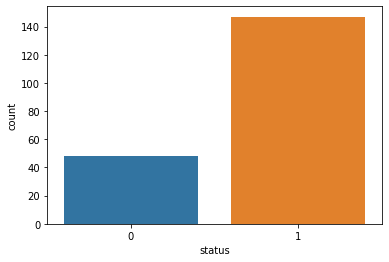

In [8]:
sns.countplot(parkinson_df['status'])

#### Conclusion
- Above plot indicates that 147 individuals suffer from Parkinson, while the rest 48 individuals don't

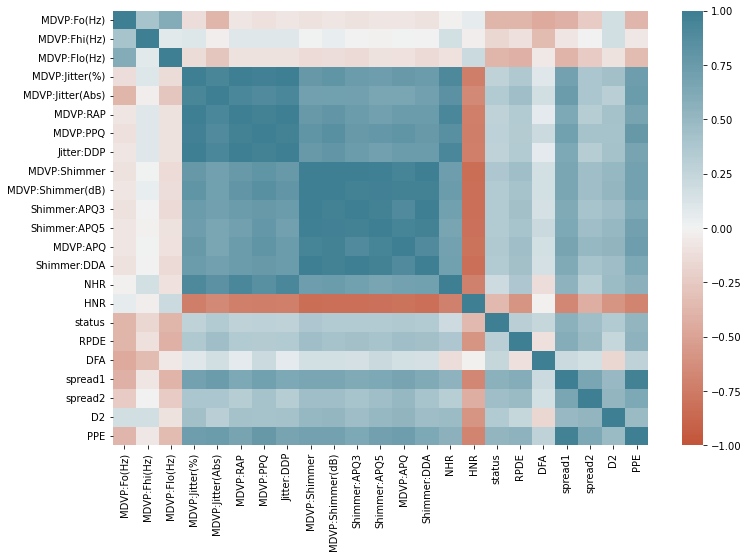

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
corr = parkinson_df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

In [10]:
# 4. feature selection

# Rearrange the columns
parkinson_df = parkinson_df[["name", "MDVP:Fo(Hz)", "MDVP:Fhi(Hz)", "MDVP:Flo(Hz)", "MDVP:Jitter(%)", "MDVP:Jitter(Abs)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "NHR", "HNR", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE", "status"]]

parkinson_df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0               0.426       0.02182       0.03130   0.02971      0.06545   
1               0.626       0.03134       0.04518   0.04368      0.09403   
2               0.482       0.02757       0.03858   0.03590      0.08270   
3               0.517       0.02924       0.04005   0.03772      0.08771   
4               0.584       0.03490       0.04825   0.04465      0.10470   
..                ...           ...           ...       ...          ...   
190             0.405       0.02336       0.02498   0.02745      0.07008   
191             0.263       0.01604       0.01657   0.01879      0.04812   
192             0.256       0.01268       0.01365   0.01667      0.03804   
193             0.241       0.01265       0.01321   0.01588      0.03794   
194             0.190       0.01026       0.01161   0.01373      0.03078   

         NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
0    0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442   
1    0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855   
2    0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259   
3    0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554   
4    0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180   
..       ...     ...       ...       ...       ...       ...       ...   
190  0.02764  19.517  0.448439  0.657899 -6.538586  0.121952  2.657476   
191  0.01810  19.147  0.431674  0.683244 -6.195325  0.129303  2.784312   
192  0.10715  17.883  0.407567  0.655683 -6.787197  0.158453  2.679772   
193  0.07223  19.020  0.451221  0.643956 -6.744577  0.207454  2.138608   
194  0.04398  21.209  0.462803  0.664357 -5.724056  0.190667  2.555477   

          PPE  status  
0    0.284654       1  
1    0.368674       1  
2    0.332634       1  
3    0.368975       1  
4    0.410335       1  
..        ...     ...  
190  0.133050       0  
191  0.168895       0  
192  0.131728       0  
193  0.123306       0  
194  0.148569       0  

[195 rows x 24 columns]

In [11]:
# create copy of original dataset
df2 = parkinson_df.copy()

# assign numeric values to the binary and categorical columns
number = LabelEncoder()
df2['name'] = number.fit_transform(df2['name'])

df2.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0     0      119.992       157.302        74.997         0.00784   
1     1      122.400       148.650       113.819         0.00968   
2     2      116.682       131.111       111.555         0.01050   
3     3      116.676       137.871       111.366         0.00997   
4     4      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0           0.00007   0.00370   0.00554     0.01109       0.04374   
1           0.00008   0.00465   0.00696     0.01394       0.06134   
2           0.00009   0.00544   0.00781     0.01633       0.05233   
3           0.00009   0.00502   0.00698     0.01505       0.05492   
4           0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0             0.426       0.02182       0.03130   0.02971      0.06545   
1             0.626       0.03134       0.04518   0.04368      0.09403   
2             0.482       0.02757       0.03858   0.03590      0.08270   
3             0.517       0.02924       0.04005   0.03772      0.08771   
4             0.584       0.03490       0.04825   0.04465      0.10470   

       NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
0  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442   
1  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855   
2  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259   
3  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554   
4  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180   

        PPE  status  
0  0.284654       1  
1  0.368674       1  
2  0.332634       1  
3  0.368975       1  
4  0.410335       1

In [12]:
df2.shape

(195, 24)

In [13]:
A = df2.iloc[:, 1:14]    # all important features
B = df2.iloc[:, -1]     # taregt (status of parkinson)

A

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  
0               0.426       0.02182       0.03130   0.02971  
1               0.626       0.03134       0.04518   0.04368  
2               0.482       0.02757       0.03858   0.03590  
3               0.517       0.02924       0.04005   0.03772  
4               0.584       0.03490       0.04825   0.04465  
..                ...           ...           ...       ...  
190             0.405       0.02336       0.02498   0.02745  
191             0.263       0.01604       0.01657   0.01879  
192             0.256       0.01268       0.01365   0.01667  
193             0.241       0.01265       0.01321   0.01588  
194             0.190       0.01026       0.01161   0.01373  

[195 rows x 13 columns]

In [14]:
B

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [15]:
# function to senect top 3 features

best_features = SelectKBest(score_func=chi2, k=3)
fit = best_features.fit(A, B)

In [16]:
# Creating dataframes for the features and the score of each feature

parkinson_scores = pd.DataFrame(fit.scores_)
parkinson_columns = pd.DataFrame(A.columns)

In [17]:
parkinson_scores

0
0   316.985398
1   227.402656
2   456.626628
3     0.056742
4     0.000614
5     0.036749
6     0.035713
7     0.110222
8     0.313475
9     3.210348
10    0.154276
11    0.193435
12    0.307076

In [18]:
parkinson_columns

0
0        MDVP:Fo(Hz)
1       MDVP:Fhi(Hz)
2       MDVP:Flo(Hz)
3     MDVP:Jitter(%)
4   MDVP:Jitter(Abs)
5           MDVP:RAP
6           MDVP:PPQ
7         Jitter:DDP
8       MDVP:Shimmer
9   MDVP:Shimmer(dB)
10      Shimmer:APQ3
11      Shimmer:APQ5
12          MDVP:APQ

In [19]:
# Create a dataframe that combines all the features and their corresponding scores

feature_scores = pd.concat([parkinson_columns, parkinson_scores], axis=1)
feature_scores.columns = ['Features', 'Score']
feature_scores

Features       Score
0        MDVP:Fo(Hz)  316.985398
1       MDVP:Fhi(Hz)  227.402656
2       MDVP:Flo(Hz)  456.626628
3     MDVP:Jitter(%)    0.056742
4   MDVP:Jitter(Abs)    0.000614
5           MDVP:RAP    0.036749
6           MDVP:PPQ    0.035713
7         Jitter:DDP    0.110222
8       MDVP:Shimmer    0.313475
9   MDVP:Shimmer(dB)    3.210348
10      Shimmer:APQ3    0.154276
11      Shimmer:APQ5    0.193435
12          MDVP:APQ    0.307076

In [20]:
feature_scores.sort_values(by='Score', ascending=False)

Features       Score
2       MDVP:Flo(Hz)  456.626628
0        MDVP:Fo(Hz)  316.985398
1       MDVP:Fhi(Hz)  227.402656
9   MDVP:Shimmer(dB)    3.210348
8       MDVP:Shimmer    0.313475
12          MDVP:APQ    0.307076
11      Shimmer:APQ5    0.193435
10      Shimmer:APQ3    0.154276
7         Jitter:DDP    0.110222
3     MDVP:Jitter(%)    0.056742
5           MDVP:RAP    0.036749
6           MDVP:PPQ    0.035713
4   MDVP:Jitter(Abs)    0.000614

#### Conclusion

From the correlation heatmap and feature selection step we can conclude that the `most affecting features` on the target output are:
1. **MDVP:Flo(Hz)**	456.626628
2. **MDVP:Fo(Hz)**	316.985398
3. **MDVP:Fhi(Hz)**	227.402656

In [21]:
# Build the model

x = parkinson_df[['MDVP:Flo(Hz)', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)']]
y = parkinson_df['status']

In [22]:
x

MDVP:Flo(Hz)  MDVP:Fo(Hz)  MDVP:Fhi(Hz)
0          74.997      119.992       157.302
1         113.819      122.400       148.650
2         111.555      116.682       131.111
3         111.366      116.676       137.871
4         110.655      116.014       141.781
..            ...          ...           ...
190        94.261      174.188       230.978
191        89.488      209.516       253.017
192        74.287      174.688       240.005
193        74.904      198.764       396.961
194        77.973      214.289       260.277

[195 rows x 3 columns]

In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

model = XGBClassifier()
model.fit(x_train, y_train)

[18:11:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# evaluate model

y_pred = model.predict(x_test)
print('accuracy score:', accuracy_score(y_test, y_pred))

accuracy score: 0.8461538461538461


In [26]:
# define metrics
y_pred_proba = model.predict_proba(x_test) [::, 1]

# calculate true positives and false positive rates
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, y_pred_proba)

# calculate area under the curve to see model performance
auc = metrics.roc_auc_score(y_test, y_pred_proba)

In [27]:
auc

0.9805194805194805

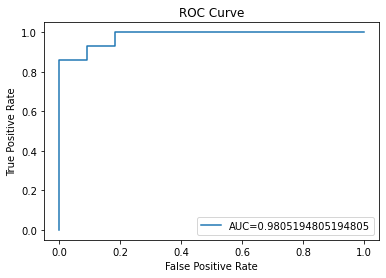

In [28]:
# create ROC curve
plt.plot(false_positive_rate, true_positive_rate, label="AUC="+str(auc))
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)

#### conclusion

Area under the curve(AUC) is 0.98 which is very close to 1, meaning that the model did good job, but may be bit overfitting.

In [29]:
# save the model to a file  -- for future predictions on unseen data
joblib.dump(model, 'XG_parkinson.pkl')

['XG_parkinson.pkl']

### Next Steps
1. explore overfit reduction techniques
2. apply those techniques and retrain/evaluate model
3. predict and evaluate on unseen data